In [1]:
import pandas as pd
import os
import glob
import gc
import numpy as np
import matplotlib.pyplot as plt

In [5]:
csv_root = '/media/leelabsg-storage1/yein/research/data/csv'
data_root = '/media/leelabsg-storage1/yein/research/BAE/RegionBAE/data'

# UKBB Phecode data

In [6]:
phe_root ='/media/leelabsg-storage0/eunjae/dnanexus/icd_code_conv/PheCode_table_ICD10_081822.txt'
phecode = pd.read_csv(phe_root, sep='\t')
phecode

,id,008,008.5,008.51,008.52,008.6,008.7,010,031,031.1,...,985,986,987,988,989,990,994,994.1,994.2,994.21
0,1000019,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1,1000022,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
2,1000035,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
3,1000046,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
4,1000054,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440012,3513612,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
440013,5575382,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
440014,4159538,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
440015,3349419,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [7]:
brain_img_df = pd.read_csv('/media/leelabsg-storage1/yein/research/data/csv/ukbb_35012.csv')
brain_img_df

,id,Age,disease
0,1000502,72,0
1,1000638,71,1
2,1000674,63,1
3,1000752,62,0
4,1000861,73,0
...,...,...,...
35007,6024590,56,1
35008,6024731,64,1
35009,6024805,65,0
35010,6024956,67,0


In [8]:
brain_img_df['disease'].value_counts()

disease
0    25656
1     9356
Name: count, dtype: int64

In [9]:
brain_mri_phe = phecode.loc[phecode.id.isin(brain_img_df['id'][brain_img_df['disease']==1])].reset_index(drop=True)
brain_mri_phe

,id,008,008.5,008.51,008.52,008.6,008.7,010,031,031.1,...,985,986,987,988,989,990,994,994.1,994.2,994.21
0,1000638,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1,1000674,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
2,1001080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
3,1001582,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
4,1002040,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,6025381,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
9206,2451906,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
9207,1415041,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
9208,4539690,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [10]:
# test code


# # 'id' 열을 인덱스로 설정
# brain_mri_phe_id = brain_mri_phe.set_index('id', inplace=False)

# # '1000638'라는 ID를 가진 샘플 행을 가져오기
# sample = brain_mri_phe_id.loc[1000638]

# # 값이 0.0 이상인 컬럼을 필터링
# columns_with_values = sample[sample > 0].index.tolist()

# # 결과 출력
# print(columns_with_values)

In [11]:
brain_mri_phe_id = brain_mri_phe.set_index('id', inplace=False)
brain_mri_phe_id

,008,008.5,008.51,008.52,008.6,008.7,010,031,031.1,038,...,985,986,987,988,989,990,994,994.1,994.2,994.21
id,,,,,,,,,,,,,,,,,,,,,
1000638,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1000674,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1001080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1001582,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1002040,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025381,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
2451906,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1415041,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [12]:
mri_disease = dict()

def root_values_filtering(data):
    # 리스트를 숫자 형태로 정렬
    data_sorted = sorted(data, key=lambda x: (int(float(x)), x))
    
    # 중복되지 않는 "루트" 값들만 남기기
    unique_roots = []
    seen_roots = set()
    
    for item in data_sorted:
        root = item.split('.')[0]  # 소수점 앞의 루트 값 추출
        if root not in seen_roots:  # 아직 보지 않은 루트 값이면 추가
            unique_roots.append(root)
            seen_roots.add(root)
    
    return unique_roots

for eid in brain_mri_phe['id']:
    sample = brain_mri_phe_id.loc[eid]
    # 질병 (1보다 크면서, 작은 카테고리 말고 큰 카테고리만 필터링할 수 있도록 정수로 typecasting 되는 values 필터링)
    disease_codes = sample[sample > 0].index.tolist()
    filtered_disease_codes = root_values_filtering(disease_codes)
    # print(eid, disease_codes, filtered_disease_codes)
    mri_disease[eid] = [filtered_disease_codes, disease_codes]

In [13]:
# 딕셔너리를 DataFrame으로 변환
mri_disease_df = pd.DataFrame([
    {'id': key, 'filtered_phe_code': value[0], 'phe_codes': value[1]}
    for key, value in mri_disease.items()
])
mri_disease_df

,id,filtered_phe_code,phe_codes
0,1000638,"[172, 195, 327, 364, 366, 367, 374, 379, 401, ...","[172, 172.1, 172.11, 172.2, 195, 195.1, 327.3,..."
1,1000674,"[172, 193, 195, 216, 241, 244, 374, 574]","[172, 172.1, 172.11, 193, 195, 195.1, 216, 241..."
2,1001080,"[195, 197, 689, 733, 743, 803, 858, 915, 960]","[195, 195.1, 197, 689, 733, 743, 743.1, 743.11..."
3,1001582,"[172, 195, 216, 366, 374, 401]","[172, 172.2, 195, 195.1, 216, 366, 374, 401, 4..."
4,1002040,"[211, 214, 455, 458, 512, 530, 578, 785]","[211, 214, 214.1, 455, 458, 458.1, 512, 512.8,..."
...,...,...,...
9205,6025381,"[172, 185, 195, 211, 244, 455, 598, 599, 600, ...","[172, 172.2, 185, 195, 195.1, 211, 244, 244.2,..."
9206,2451906,[],[]
9207,1415041,[],[]
9208,4539690,[],[]


In [14]:
for key, value in mri_disease.items():
    if (len(value[0]) == 0) or (len(value[1]) == 0):
        print(key)

2451906
1415041
4539690
3379755


# Phecode

In [15]:
phe_esm = pd.read_excel(csv_root+'/phecode_esm.xlsx', sheet_name=1)
phe_esm

,phecode,name,group,n,n_case,or,ci_lower,ci_upper,z,p
0,300,Anxiety disorders,mental disorders,109767,8886,1.639045,1.582127,1.698011,27.400720,2.688897e-165
1,564,Functional digestive disorders,digestive,105075,33242,1.227226,1.201627,1.253370,19.037959,8.268714e-81
2,401,Hypertension,circulatory system,117729,80060,1.145007,1.126818,1.163490,16.574087,1.072797e-61
3,785,Abdominal pain,symptoms,117885,40072,1.165437,1.143987,1.187290,16.152275,1.094502e-58
4,535,Gastritis and duodenitis,digestive,116707,30236,1.193614,1.167925,1.219868,15.943887,3.141885e-57
...,...,...,...,...,...,...,...,...,...,...
398,1006,Crushing injury,injuries & poisonings,117885,559,0.980929,0.795792,1.209137,-0.180434,8.568122e-01
399,262,Mineral deficiency NEC,endocrine/metabolic,117344,315,0.992251,0.782317,1.258520,-0.064142,9.488575e-01
400,1007,Injury to blood vessels,injuries & poisonings,117885,284,0.995050,0.775755,1.276335,-0.039070,9.688344e-01
401,246,Other disorders of thyroid,endocrine/metabolic,113062,413,0.997014,0.826413,1.202833,-0.031229,9.750866e-01


In [16]:
disease_group = phe_esm['group'].unique()
disease_group

array(['mental disorders', 'digestive', 'circulatory system', 'symptoms',
       'endocrine/metabolic', 'musculoskeletal', 'neurological',
       'neoplasms', 'genitourinary', 'injuries & poisonings',
       'respiratory', 'infectious diseases', 'hematopoietic',
       'sense organs', 'dermatologic', 'congenital anomalies'],
      dtype=object)

In [17]:
def id_filtering_group(group_name):
    group_phe = sorted(phe_esm['phecode'][phe_esm['group']==group_name].tolist())
    print(group_phe)

    disease_data = dict()
    for phecode in group_phe:
        disease_name = phe_esm['name'][phe_esm['phecode']==phecode].iloc[0]
        print(phecode, disease_name)
        filtered_id = id_filtering_single(phecode)
        disease_data[phecode] = len(filtered_id)

    id_disease_disorders = list()
    for key, value in mri_disease.items():
        for code in group_phe:
            if str(code) in value[0]:
                id_disease_disorders.append(key)
                break
    print(f"\nTotal number of {group_name}: {len(id_disease_disorders)}")

    group_plot(disease_data)
    
    return id_disease_disorders


def id_filtering_single(disease_code):
    id_disease = list()
    disease_name = phe_esm['name'][phe_esm['phecode']==disease_code].iloc[0]
    # print(disease_code, disease_name)
    
    for key, value in mri_disease.items():
        if str(disease_code) in value[0]:
            id_disease.append(key)
            
    # print(f"\nTotal number of {disease_name}: {len(id_disease)}")
    return id_disease

def group_plot(data):
    # 딕셔너리 키와 값을 각각 x축과 y축 데이터로 변환
    x = list(data.keys())
    y = list(data.values())
    
    # 플롯 그리기
    plt.figure(figsize=(20, 10))
    plt.xticks(range(min(x), max(x), 1))
    plt.bar(x, y, color='skyblue')  # 막대 그래프를 사용
    plt.xlabel('Key')  # x축 레이블
    plt.ylabel('Count')  # y축 레이블
    plt.title('Count per Key')  # 그래프 제목
    plt.show()

[320, 323, 324, 327, 331, 332, 333, 334, 335, 337, 338, 339, 340, 341, 342, 344, 345, 348, 349, 350, 351, 352, 353, 357, 359]
320 Meningitis
323 Encephalitis
324 Other CNS infection and poliomyelitis
327 Sleep disorders
331 Other cerebral degenerations
332 Parkinson's disease
333 Extrapyramidal disease and abnormal movement disorders
334 Degenerative disease of the spinal cord
335 Multiple sclerosis
337 Disorders of the autonomic nervous system
338 Pain
339 Other headache syndromes
340 Migraine
341 Other demyelinating diseases of central nervous system
342 Hemiplegia
344 Other paralytic syndromes
345 Epilepsy, recurrent seizures, convulsions
348 Other conditions of brain
349 Other and unspecified disorders of the nervous system
350 Abnormal movement
351 Other peripheral nerve disorders
352 Disorders of other cranial nerves
353 Nerve root and plexus disorders
357 Inflammatory and toxic neuropathy
359 Muscular dystrophies and other myopathies

Total number of neurological: 1561


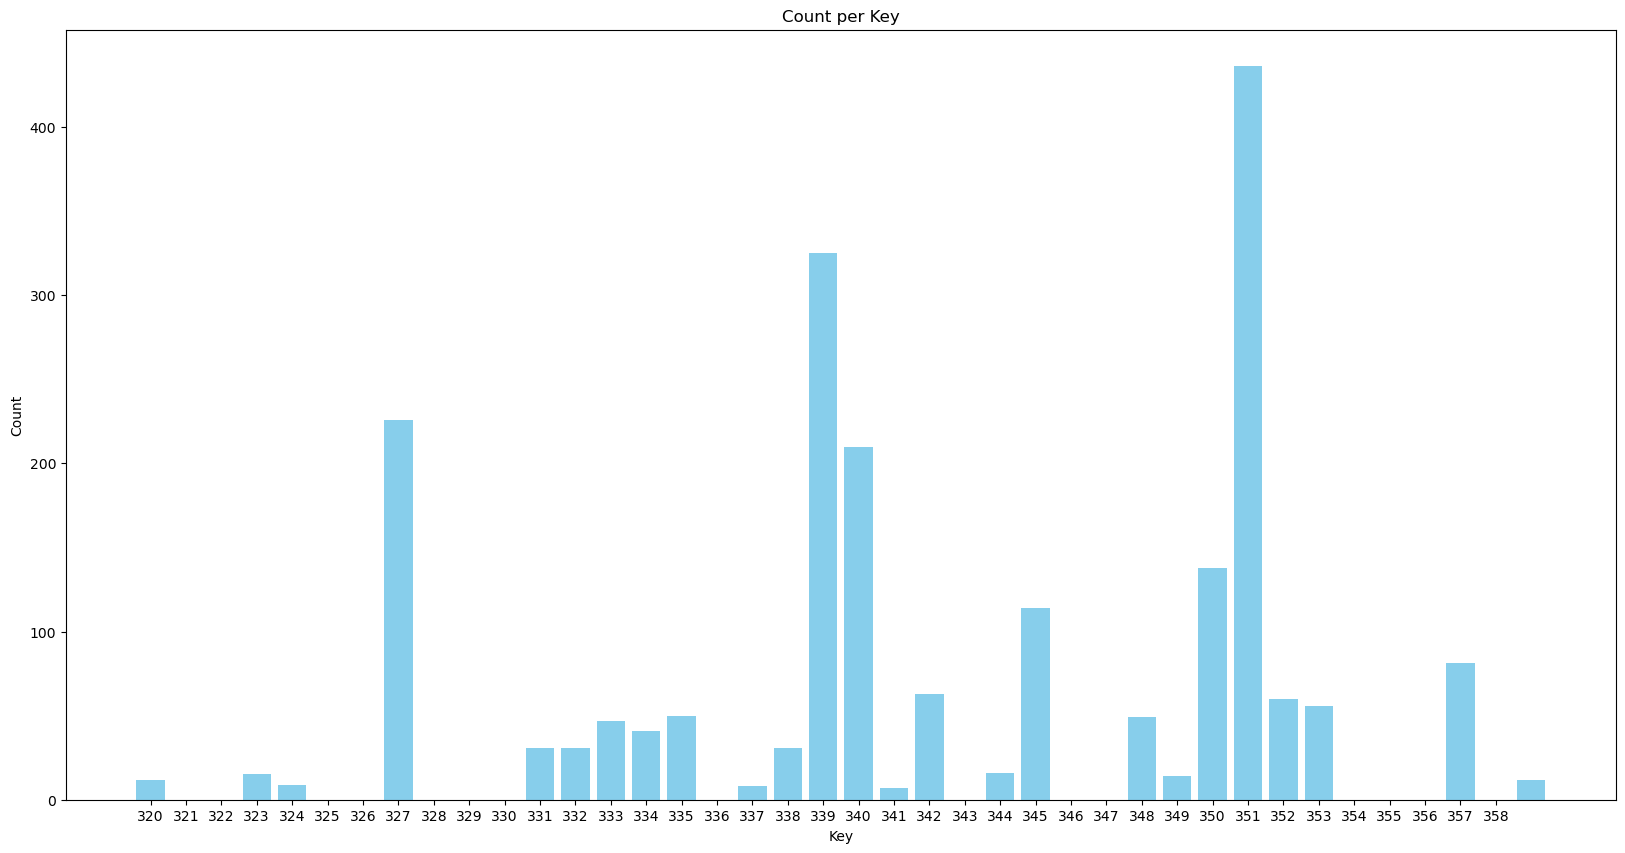

In [18]:
id_neurological_disorders = id_filtering_group(disease_group[6])

[290, 291, 292, 293, 295, 296, 297, 300, 301, 303, 304, 306, 315, 316, 317, 318]
290 Delirium dementia and amnestic and other cognitive disorders
291 Other specified nonpsychotic and/or transient mental disorders
292 Neurological disorders
293 Symptoms involving head and neck
295 Schizophrenia and other psychotic disorders
296 Mood disorders
297 Suicidal ideation or attempt
300 Anxiety disorders
301 Personality disorders
303 Psychogenic and somatoform disorders
304 Adjustment reaction
306 Other mental disorder
315 Develomental delays and disorders
316 Substance addiction and disorders
317 Alcohol-related disorders
318 Tobacco use disorder

Total number of mental disorders: 3269


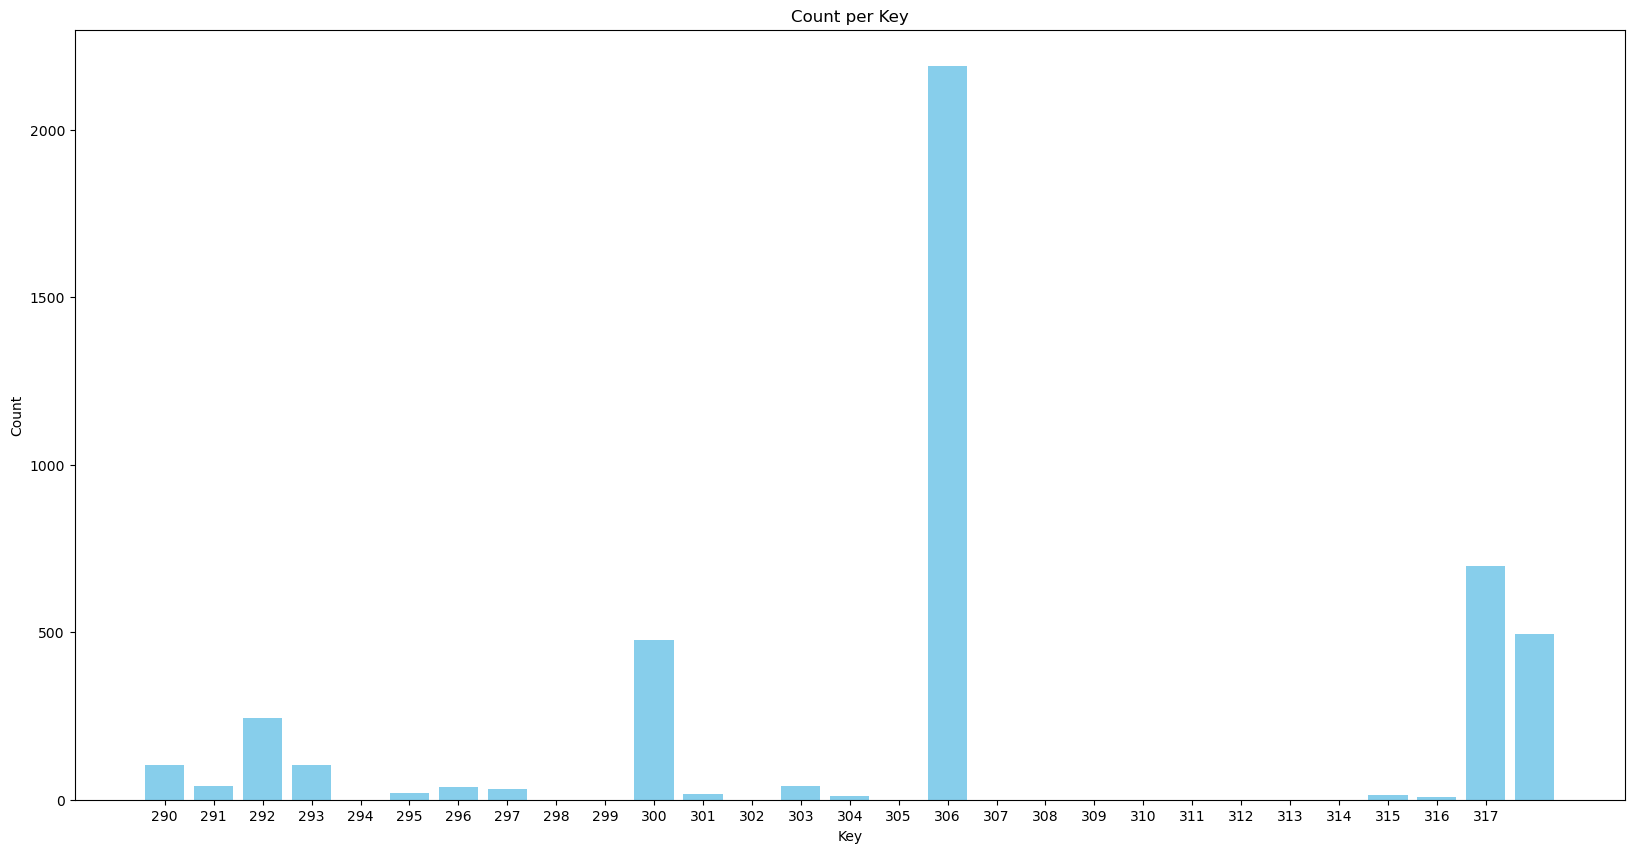

In [19]:
id_mental_disorders = id_filtering_group(disease_group[0])

[394, 395, 396, 401, 402, 411, 414, 415, 416, 418, 420, 425, 426, 427, 428, 429, 430, 433, 440, 441, 442, 443, 444, 446, 447, 448, 450, 451, 452, 454, 455, 458, 459]
394 Rheumatic disease of the heart valves
395 Heart valve disorders
396 Abnormal heart sounds
401 Hypertension
402 Elevated blood pressure reading without diagnosis of hypertension
411 Ischemic Heart Disease
414 Other forms of chronic heart disease
415 Pulmonary heart disease
416 Cardiomegaly
418 Nonspecific chest pain
420 Carditis
425 Cardiomyopathy
426 Cardiac conduction disorders
427 Cardiac dysrhythmias
428 Congestive heart failure; nonhypertensive
429 Ill-defined descriptions and complications of heart disease
430 Intracranial hemorrhage
433 Cerebrovascular disease
440 Atherosclerosis
441 Vascular insufficiency of intestine
442 Other aneurysm
443 Peripheral vascular disease
444 Arterial embolism and thrombosis
446 Polyarteritis nodosa and allied conditions
447 Other disorders of arteries and arterioles
448 Disease of 

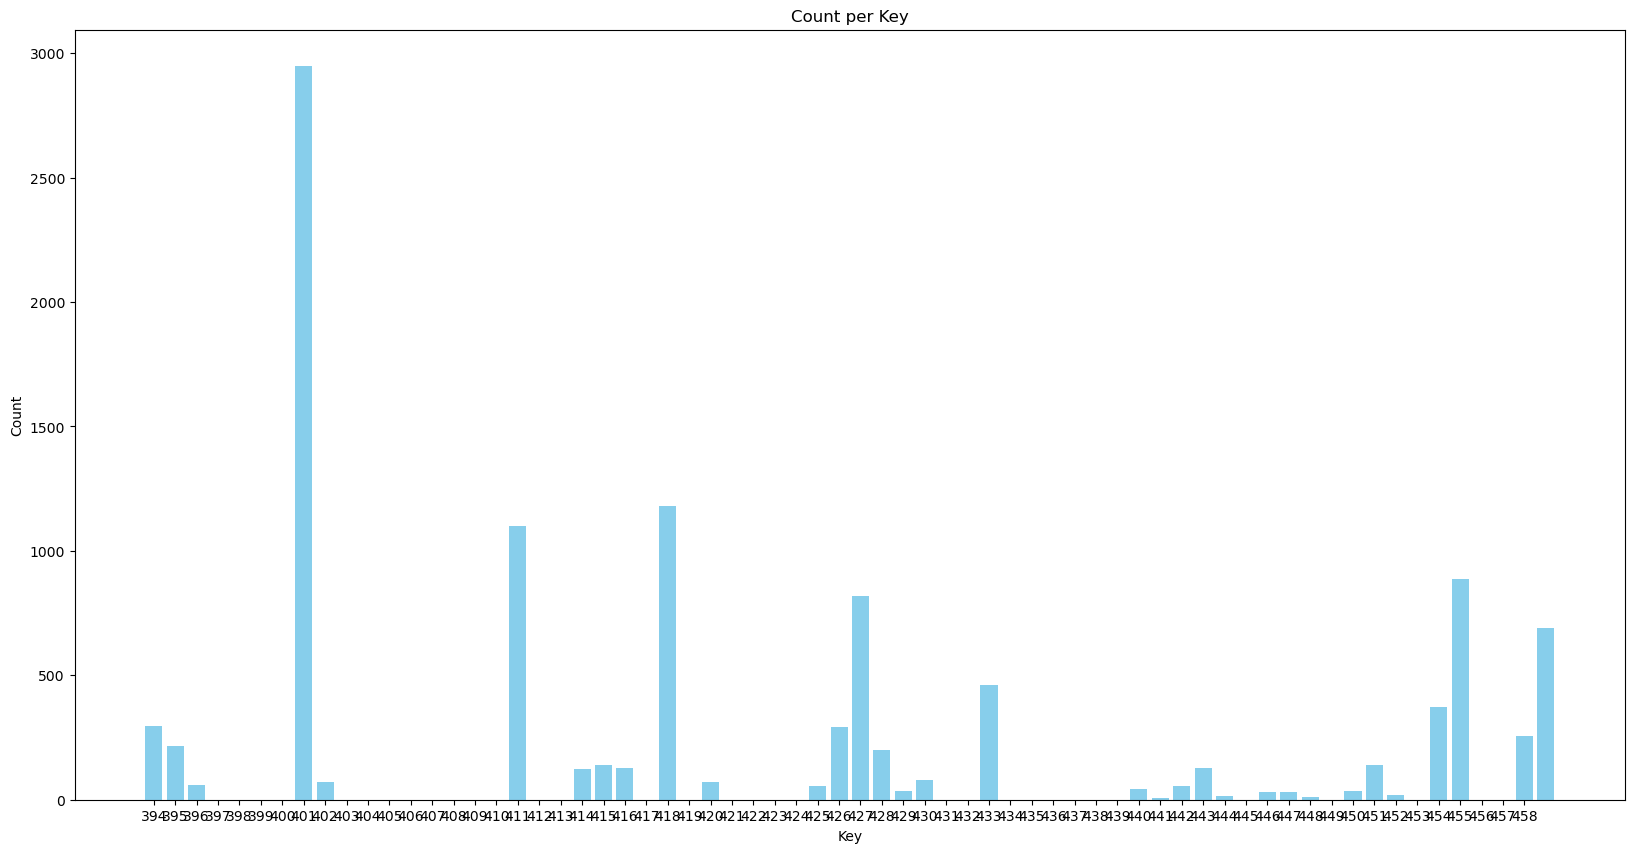

In [20]:
id_circulatory_disorders = id_filtering_group(disease_group[2])

[240, 241, 242, 244, 245, 246, 250, 251, 252, 253, 255, 260, 261, 262, 269, 270, 272, 274, 275, 276, 277, 278, 279]
240 Simple and unspecified goiter
241 Nontoxic nodular goiter
242 Thyrotoxicosis with or without goiter
244 Hypothyroidism
245 Thyroiditis
246 Other disorders of thyroid
250 Diabetes mellitus
251 Other disorders of pancreatic internal secretion
252 Disorders of parathyroid gland
253 Disorders of the pituitary gland and its hypothalamic control
255 Disorders of adrenal glands
260 Protein-calorie malnutrition
261 Vitamin deficiency
262 Mineral deficiency NEC
269 Proteinuria
270 Disorders of protein plasma/amino-acid transport and metabolism
272 Disorders of lipoid metabolism
274 Gout and other crystal arthropathies
275 Disorders of mineral metabolism
276 Disorders of fluid, electrolyte, and acid-base balance
277 Other disorders of metabolism
278 Overweight, obesity and other hyperalimentation
279 Disorders involving the immune mechanism

Total number of endocrine/metabolic:

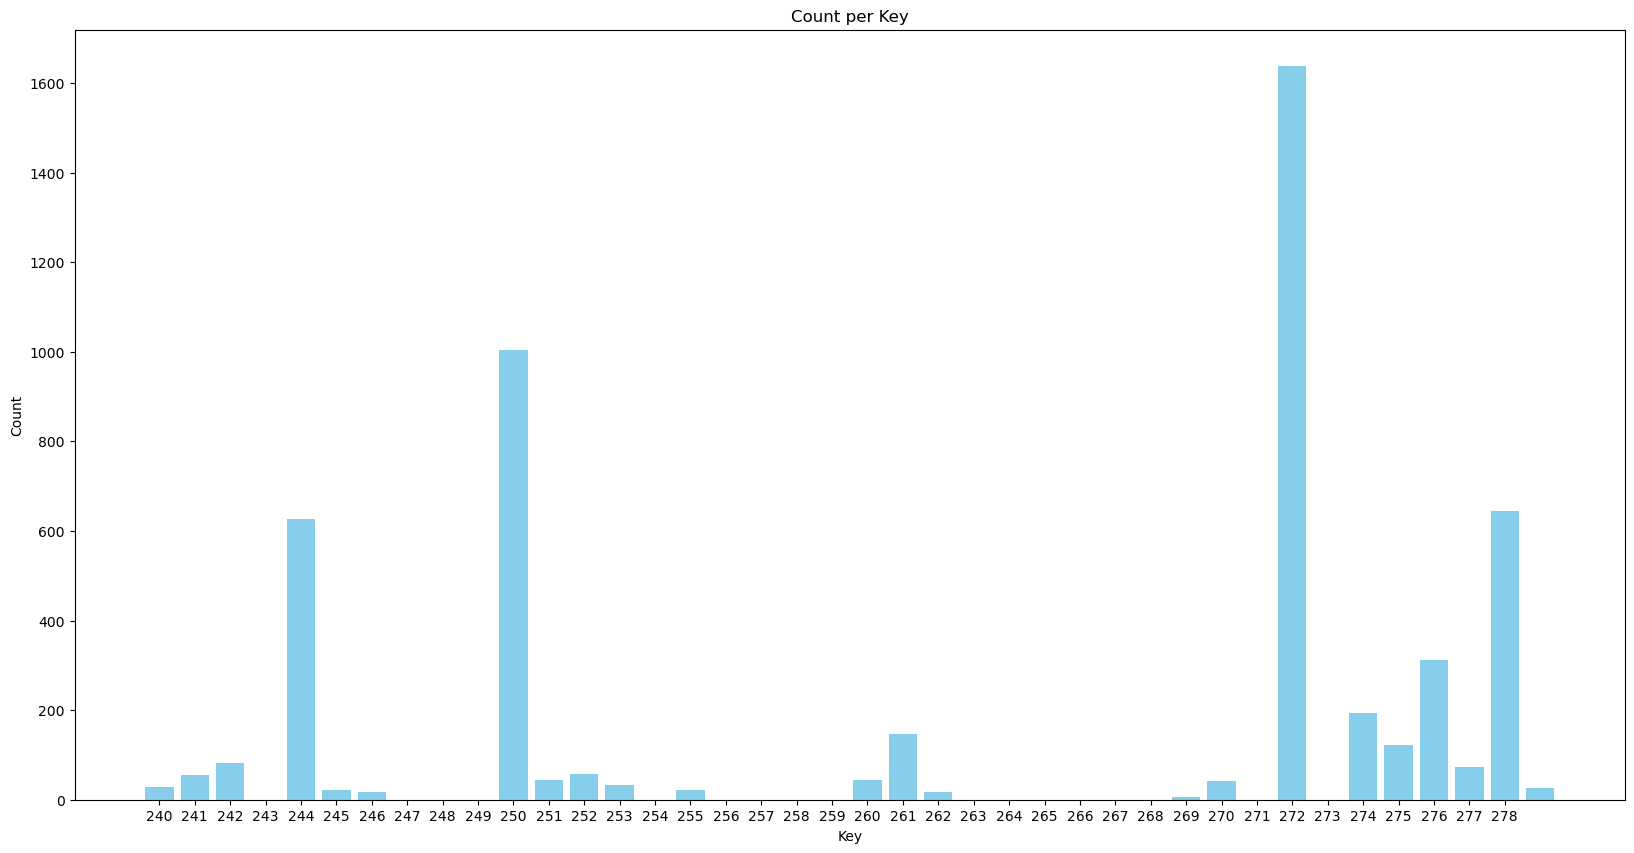

In [21]:
id_metabolic = id_filtering_group(disease_group[4])

[520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 535, 536, 537, 540, 550, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 567, 568, 569, 571, 572, 573, 574, 575, 577, 578, 579]
520 Disorders of tooth development
521 Diseases of hard tissues of teeth
522 Diseases of pulp and periapical tissues
523 Gingival and periodontal diseases
524 Dentofacial anomalies, including malocclusion
525 Other diseases of the teeth and supporting structures
526 Diseases of the jaws
527 Diseases of the salivary glands
528 Diseases of the oral soft tissues, excluding lesions specific for gingiva and tongue
529 Diseases and other conditions of the tongue
530 Diseases of esophagus
531 Peptic ulcer (excl. esophageal)
532 Dysphagia
535 Gastritis and duodenitis
536 Disorders of function of stomach
537 Other disorders of stomach and duodenum
540 Appendiceal conditions
550 Abdominal hernia
555 Inflammatory bowel disease and other gastroenteritis and colitis
556 Ulceration of the lower GI trac

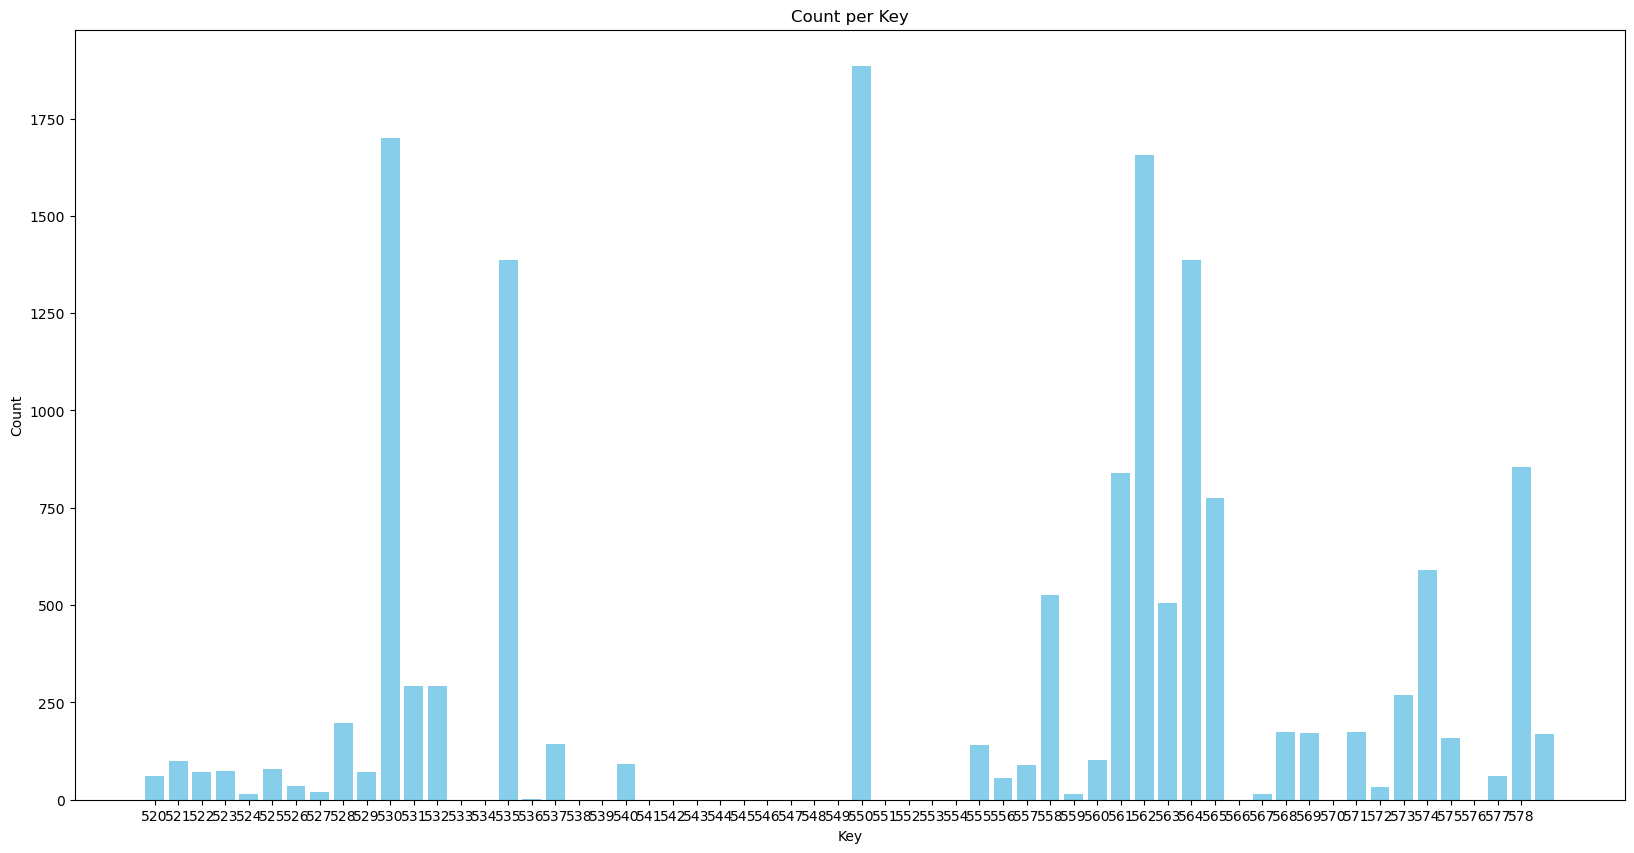

In [25]:
id_digestive = id_filtering_group(disease_group[1])

In [23]:
# def mk_csv(filtered_id, csv_name):
#     mri_disease = brain_img_df[brain_img_df['id'].isin(filtered_id)].reset_index(drop=True)
#     save_path = os.path.join(csv_root, 'ukbb_phe_' + csv_name + '.csv')
#     mri_disease.to_csv(save_path)

# mk_csv(id_neurological_disorders, 'neurological')

In [24]:
id_diabete = id_filtering_single(250)
print(len(id_diabete))
# mk_csv(id_diabete, 'diabete')

1004


In [ ]:
# mk_csv(id_mental_disorders, 'mental')

In [7]:
save_path = '/media/leelabsg-storage1/yein/research/data/ukbb_region/disease'
regions = ['caudate', 'cerebellum', 'frontal_lobe', 'insula', 'occipital_lobe', 'parietal_lobe', 'putamen', 'temporal_lobe', 'thalamus']
diseases = ['neurological', 'diabete', 'mental']

for code in diseases:
    ukb_icd = pd.read_csv(f'/media/leelabsg-storage1/yein/research/data/csv/ukbb_phe_{code}.csv')

    csv_data = {
        'subjectID': [],
        'imgs': [],
        'mask': [],
        'age': []
    }
    
    for region in regions:
        csv_data[region] = []
        csv_data[f'{region}_mask'] = []
        
    for i in ukb_icd.index:
        subject = ukb_icd['id'][i]
        subject = str(subject) + '_20252_2_0'
    
        csv_data['subjectID'].append(ukb_icd['id'][i])
        csv_data['age'].append(ukb_icd['Age'][i])
        csv_data['imgs'].append(f'{save_path}/{subject}/T1w_registered.nii.gz')
        csv_data['mask'].append(f'{save_path}/{subject}/T1w_brain_mask_registered.nii.gz')
        csv_data['caudate'].append(f'{save_path}/{subject}/region_1.nii.gz')
        csv_data['caudate_mask'].append(f'{save_path}/3068434/region_1_mask.nii.gz')
        csv_data['cerebellum'].append(f'{save_path}/{subject}/region_2.nii.gz')
        csv_data['cerebellum_mask'].append(f'{save_path}/{subject}/region_2_mask.nii.gz')
        csv_data['frontal_lobe'].append(f'{save_path}/{subject}/region_3.nii.gz')
        csv_data['frontal_lobe_mask'].append(f'{save_path}/{subject}/region_3_mask.nii.gz')
        csv_data['insula'].append(f'{save_path}/{subject}/region_4.nii.gz')
        csv_data['insula_mask'].append(f'{save_path}/{subject}/region_4_mask.nii.gz')
        csv_data['occipital_lobe'].append(f'{save_path}/{subject}/region_5.nii.gz')
        csv_data['occipital_lobe_mask'].append(f'{save_path}/{subject}/region_5_mask.nii.gz')
        csv_data['parietal_lobe'].append(f'{save_path}/{subject}/region_6.nii.gz')
        csv_data['parietal_lobe_mask'].append(f'{save_path}/{subject}/region_6_mask.nii.gz')
        csv_data['putamen'].append(f'{save_path}/{subject}/region_7.nii.gz')
        csv_data['putamen_mask'].append(f'{save_path}/{subject}/region_7_mask.nii.gz')
        csv_data['temporal_lobe'].append(f'{save_path}/{subject}/region_8.nii.gz')
        csv_data['temporal_lobe_mask'].append(f'{save_path}/{subject}/region_8_mask.nii.gz')
        csv_data['thalamus'].append(f'{save_path}/{subject}/region_9.nii.gz')
        csv_data['thalamus_mask'].append(f'{save_path}/{subject}/region_9_mask.nii.gz')

    df = pd.DataFrame(csv_data)
    df.to_csv(f'/media/leelabsg-storage1/yein/research/BAE/RegionBAE/data/ukbb_{code}_region.csv', index=False)